# Machine Learning Pipeline for Car Evaluation Prediction

## Connect to Google Drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
import os
%cd /content/drive/My Drive/Colab Notebooks

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive/Colab Notebooks


## Import all Libraries

In [3]:
# Import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
!pip install --upgrade pip
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 19.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import the data set and view this description


In [4]:
# Load the dataset  
col_names = ['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety', 'decision']
path = "car_evaluation.csv"
car_data = pd.read_csv(path, header = 0, names = col_names)

print(car_data.shape)
print(car_data.head())
print(car_data.describe())

(1727, 7)
  buyPrice maintCost noDoors noPersons bootLuggage safety decision
0    vhigh     vhigh       2         2       small    med    unacc
1    vhigh     vhigh       2         2       small   high    unacc
2    vhigh     vhigh       2         2         med    low    unacc
3    vhigh     vhigh       2         2         med    med    unacc
4    vhigh     vhigh       2         2         med   high    unacc
       buyPrice maintCost noDoors noPersons bootLuggage safety decision
count      1727      1727    1727      1727        1727   1727     1727
unique        4         4       4         3           3      3        4
top        high      high       3         4         med    med    unacc
freq        432       432     432       576         576    576     1209


## View Column-wise Statistics

In [5]:
car_data.info()
for col in col_names:
    print(car_data[col].value_counts()) 

car_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     1727 non-null   object
 1   maintCost    1727 non-null   object
 2   noDoors      1727 non-null   object
 3   noPersons    1727 non-null   object
 4   bootLuggage  1727 non-null   object
 5   safety       1727 non-null   object
 6   decision     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
high     432
med      432
low      432
vhigh    431
Name: buyPrice, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maintCost, dtype: int64
3        432
4        432
5more    432
2        431
Name: noDoors, dtype: int64
4       576
more    576
2       575
Name: noPersons, dtype: int64
med      576
big      576
small    575
Name: bootLuggage, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69

buyPrice       0
maintCost      0
noDoors        0
noPersons      0
bootLuggage    0
safety         0
decision       0
dtype: int64

## View the Distribution of Target Variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


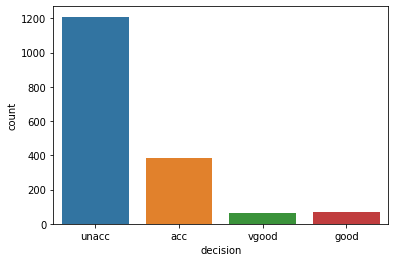

In [6]:
sns.countplot(car_data['decision'])

## View the Distribution of Target Columns 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

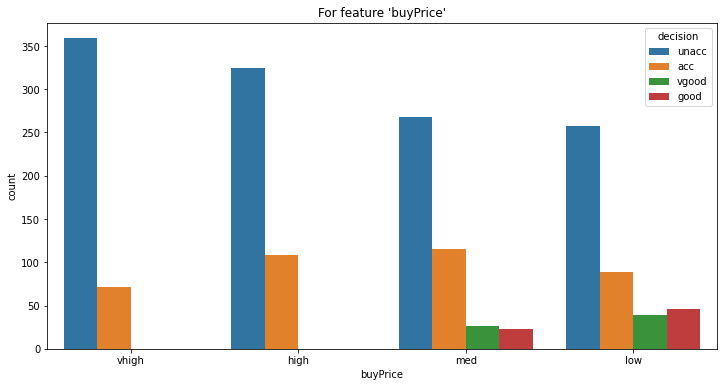

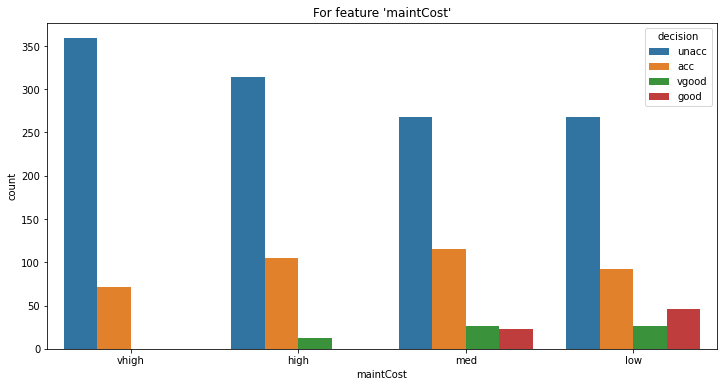

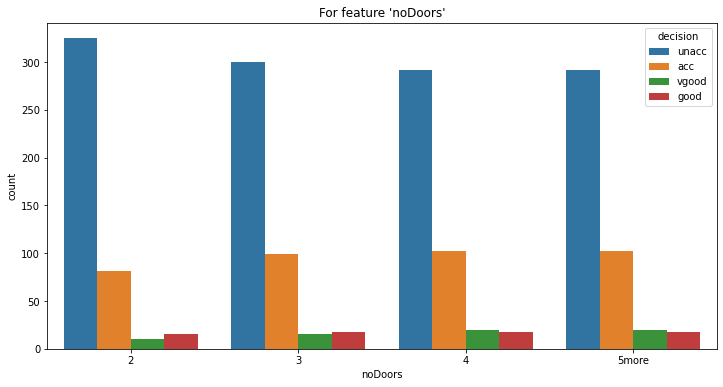

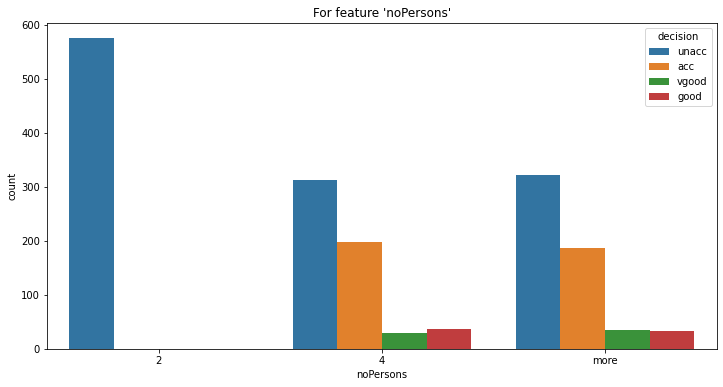

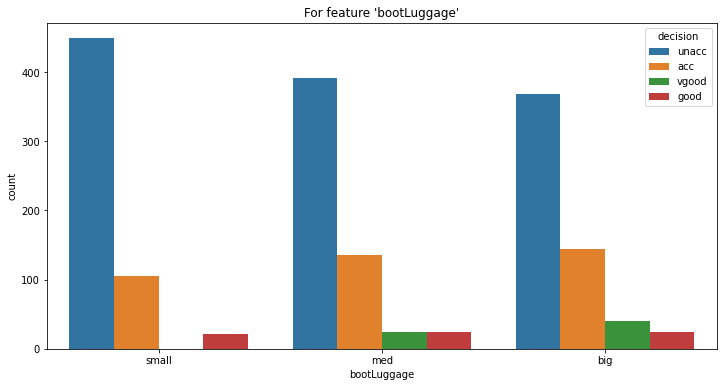

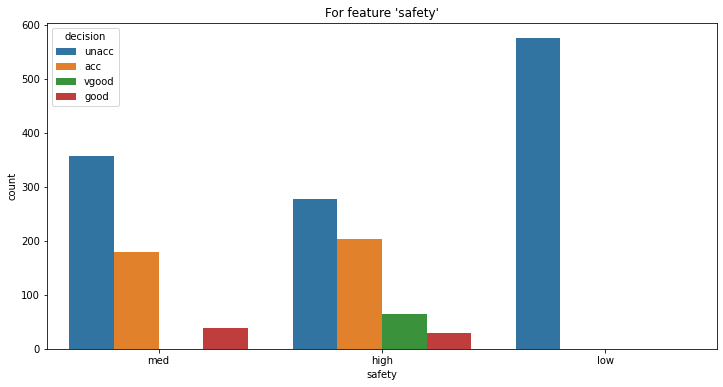

In [7]:
for i in car_data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(car_data[i],hue=car_data['decision'])

# Pre-process the Dataset

In [9]:
# Encode Categorical Features 
! pip install --upgrade category_encoders
import category_encoders as ce

# Encode all input fields to numerical value
encoder = ce.OrdinalEncoder(cols=['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage', 'safety'])

car_data = encoder.fit_transform(car_data)

# View the encoded data 
print(car_data.head())
car_data.head()

car_data.describe().round(2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 8.0 MB/s eta 0:00:00
   buyPrice  maintCost  noDoors  noPersons  bootLuggage  safety decision
0         1          1        1          1            1       1    unacc
1         1          1        1          1            1       2    unacc
2         1          1        1          1            2       3    unacc
3         1          1        1          1            2       1    unacc
4         1          1        1          1            2       2    unacc


,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety
count,1727.00,1727.00,1727.00,1727.00,1727.00,1727.00
mean,2.50,2.50,2.50,2.00,2.00,2.00
std,1.12,1.12,1.12,0.82,0.82,0.82
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,2.00,2.00,1.00,1.00,1.00
50%,3.00,3.00,3.00,2.00,2.00,2.00
75%,3.50,3.50,3.50,3.00,3.00,3.00
max,4.00,4.00,4.00,3.00,3.00,3.00


## Plot Histogram of all Fields

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1eea588f50>,
      dtype=object)

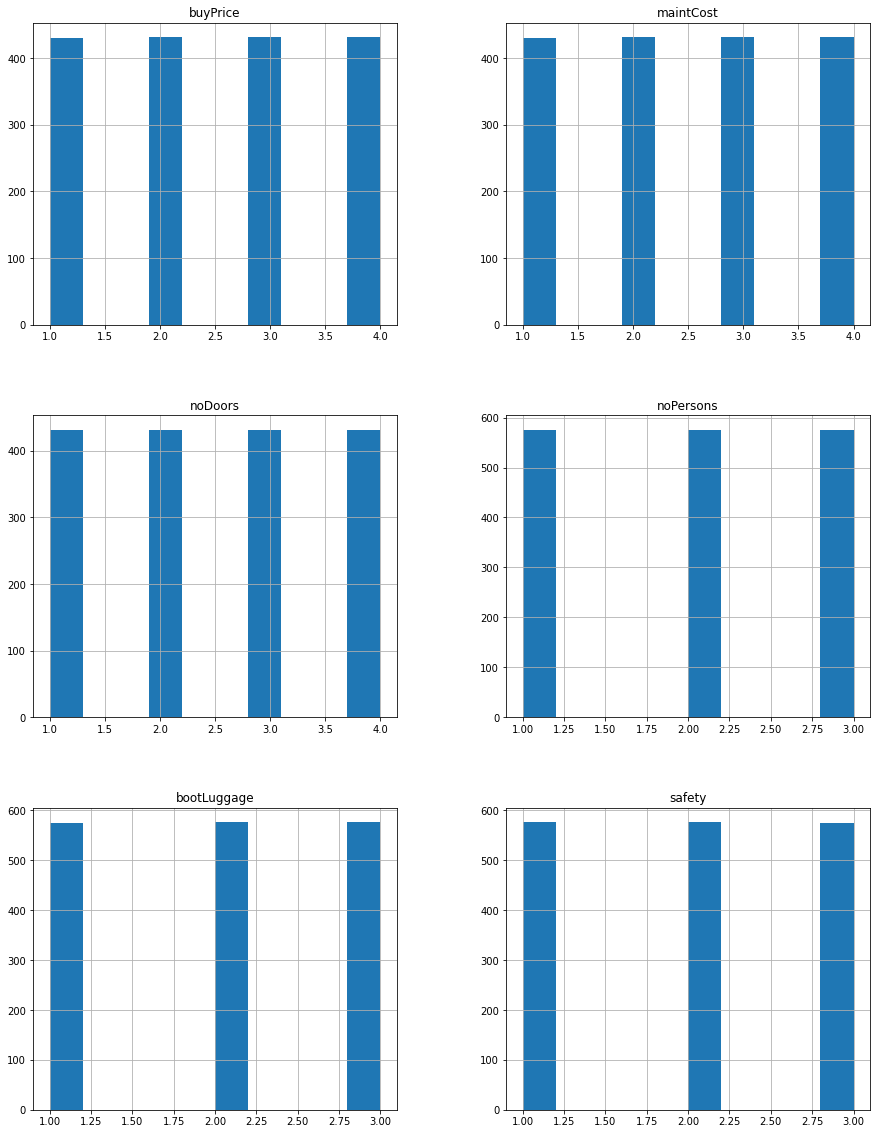

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
car_data.hist(ax = ax)

## Plot the Correlatiom matrix to find out the extent of correlation between fields 

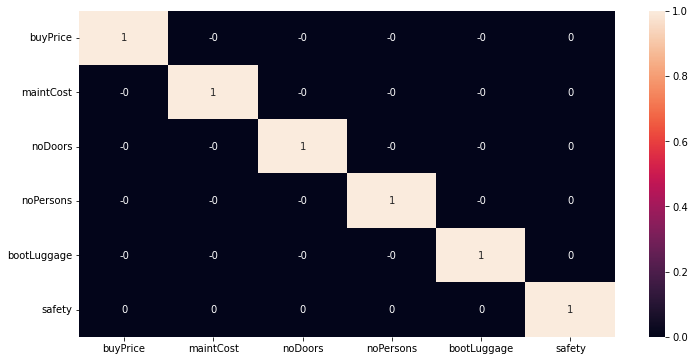

In [11]:
corr_matrix = car_data.corr().round(2)
plt.figure(figsize = (12, 6))
sns.heatmap(corr_matrix, annot = True)

## Prepare the input and output data 

In [12]:
# Input 
X = car_data.drop(['decision'], axis=1)

# Output
y = car_data['decision']

X.head()


,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


In [13]:
# Perform Normalization 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

print(X.head())
y[:5]

   buyPrice  maintCost  noDoors  noPersons  bootLuggage  safety
0       0.0        0.0      0.0        0.0          0.0     0.0
1       0.0        0.0      0.0        0.0          0.0     0.5
2       0.0        0.0      0.0        0.0          0.5     1.0
3       0.0        0.0      0.0        0.0          0.5     0.0
4       0.0        0.0      0.0        0.0          0.5     0.5


0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: decision, dtype: object

## Train a Logistic Regression Model 

In [14]:
#Train a Model
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l2', 'none'],
              'max_iter': [100, 200, 300, 400, 500]
             }

# use gridsearch to do 5-fold cross validation
lgr_gscv = GridSearchCV(lgr, param_grid, cv = 5)


lgr_gscv.fit(X, y)
lgr_gscv.best_params_
lgr_gscv.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6977381251570748

## Train a Naive Bayes Model 

In [15]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
from sklearn.model_selection import GridSearchCV
param_grid = {}

# use gridsearch to do 5-fold cross validation
mnb_gscv = GridSearchCV(mnb, param_grid, cv = 5)


mnb_gscv.fit(X, y)
mnb_gscv.best_score_

0.7000586411996315

## Train a K Nearest Neighbour 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to do 5-fold cross validation
knn_gscv = GridSearchCV(knn, param_grid, cv = 5)


knn_gscv.fit(X, y)

knn_gscv.best_estimator_
knn_gscv.best_score_


0.9224344475161264

## Train a MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 700, random_state = 1)
param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
              'activation': ['relu','tanh','logistic'],
              'learning_rate': ['constant','adaptive'],
              'solver': ['adam', 'sgd']}

mlp_gscv = GridSearchCV(
    mlp,
    param_grid,
    cv=5, verbose=0, n_jobs=-1)

mlp_gscv.fit(X, y)


mlp_gscv.best_params_
mlp_gscv.best_score_

## Train a DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1)

In [ ]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [3, 5, 7, 10]}

dt_gscv = GridSearchCV(
    dt,
    param_grid,
    cv=5, verbose=0, n_jobs=-1)

dt_gscv.fit(X, y)


dt_gscv.best_params_
dt_gscv.best_score_

## Train a RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=700, random_state = 1, n_jobs = -1)
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [3, 5, 7, 10]}

random_forest_gscv = GridSearchCV(
    random_forest,
    param_grid,
    cv=5, verbose=0, n_jobs=-1)

random_forest_gscv.fit(X, y)


random_forest_gscv.best_params_

random_forest_gscv.best_score_

## Train a XGB Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_xgb = le.fit_transform(y)


from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, random_state = 1)

param_grid = {
    'eta': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.9],
    'learning_rate': [0.05, 0.1, 0.3],
}

from sklearn.model_selection import GridSearchCV
xgb_gscv = GridSearchCV(
    xgb,
    param_grid,
    cv=5, verbose=0, n_jobs=-1)

xgb_gscv.fit(X, y_xgb)
xgb_gscv.best_params_

xgb_gscv.best_score_